# Classification of Audio Signals

# Introduction

Audio signals are  the complex representation of time series. that are composed of the combination of many different frequencies added together. 
Audio signals are processed through the sampling.  sampling is the reduction of a continuous signal into a series of discrete values. the number of samples taken over some fixed amount of time is defined by  sampling frequency or rate.


In this study, 8732 audio files are given as the wav format. The data is saved in DataF folder. The task is to build a classification model that identify the label of each audio signal.

The selected libraries are imported from python3.

In [3]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
import multiprocessing as mp
from multiprocessing import Pool
from joblib import Parallel, delayed
%matplotlib inline
import IPython.display
# from ipywidgets import interact, interactive, fixed

# Packages we're using
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import scipy.ndimage
import soundfile
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 
import os

Using TensorFlow backend.





One of the key factors of sampling the audio signal is to identify the right frequency that could compensate the computational expenses (as a result of the high frequency) or loss of  information(low frequency)


on the other hand, the amplitiude of signal is usually measured as a function of the change in pressure around the microphone or receiver device that originally picked up the audio.

The pipe line of this project is as follows:

## A.  Audio Signal processing:
    1. converting the datafiles from PCM_24 to PCM_16
    2.Processing the audio signals using Librosa
    3.Extracting MFCCs from audio using Librosa



### 1. converting the datafiles from PCM_24 to PCM_16
In digital audio using pulse-code modulation (PCM), bit depth is the number of bits of information in each sample, and it directly corresponds to the resolution of each sample. Examples of bit depth include Compact Disc Digital Audio, which uses 16 bits per sample, and DVD-Audio and Blu-ray Disc which can support up to 24 bits per sample.

The PCM of this data set is 24 bits per sample that can't be directly read from wavfile function.  to be able to load the wav file, they should be connverted into PCM_16.
In this study, the data are converted to PCM_16 and are stored in DataF folder in the directory, using soundfile library in python.


In [2]:
def read24(file,path):
    if ".wav" in file:
        mywav=path+file
        data, samplerate = soundfile.read(mywav)
        soundfile.write('./DataF/'+ file, data, samplerate, subtype='PCM_16')

    

In [82]:
# path="./Data 2/"
# num_cores= mp.cpu_count()
# Parallel(n_jobs=num_cores)(delayed(read24)(i,path) for i in audio_files)

### 2. Processing the audio signals using  Librosa (Short-Term  Fourier Transformation)
Human hearing ranges from 20hz to 20,000hz. The higher the frequency, the more cycles per second, and the "higher" the pitch sounds to us.


On the other hand,  the human perception of hearing is not linear, it is logarithmic. This will be important later as the range of frequencies from 100-200hz convey as much information to us as the range from 10,000-20,000hz. 


Hence, in audio signal analysis, the preprocessing step is largely based on finding components of an audio signal that can help us distinguish it from other signals.


Fortunately, scientists have thought about this problem and came up with something called the mel scale.


#### Mel Scale
The mel scale is a human-centered metric of audio perception that was developed by asking participants to judge how far apart different tones were. 

Librosa allows us to generate a spectrogram with the melscale directly using librosa.feature.melspectrogram.

To do so, first the audio signal is sampled through the librosa.load function.
Librosa’s load function will convert the sampling rate to 22.05 KHz automatically. It will also normalize the bit depth between -1 and 1.



In [3]:
audio_files=os.listdir("./DataF/")
example=audio_files[1]
example="./DataF/"+example
## loading the original wave file
rate, data = wavfile.read(example)
## sampling the audio signal usinnng librosa
librosa_audio, librosa_sample_rate = librosa.load(example)

In [4]:
print("Original sample rate: {}".format(rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))

Original sample rate: 48000
Librosa sample rate: 22050


#### Comparing the Original audio signal versus the sampled singal 

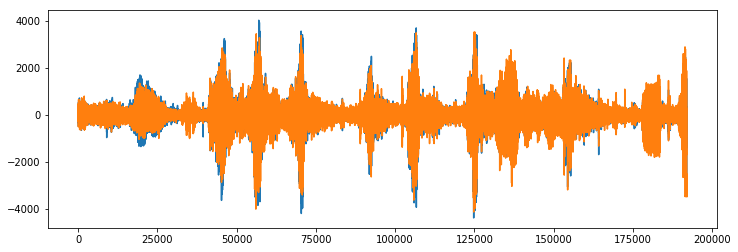

In [199]:
plt.figure(figsize=(12, 4))
plt.plot(data)

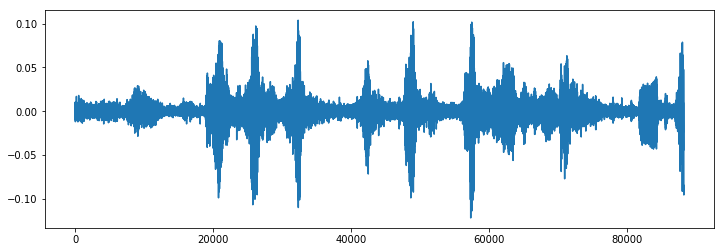

In [200]:
##with librosa
plt.figure(figsize=(12,4))
plt.plot(librosa_audio)

### 3.Extracting MFCCs(	Mel Frequency Cepstral Coefficients) from audio using Librosa



#### Steps for calculating MFCCs for a given audio sample:
1. Slice the signal into short frames (of time)

it's based on the assumption that on short enough time scales the audio signal  doesn’t change. Typical values for the duration of the short frames are between 20–40ms.
  
  
2. Compute the periodogram estimate of the power spectrum for each frame

applying the Short-time fourier transform to each frame to obtain a power spectra for each.  

3. Apply the mel filterbank to the power spectra and sum the energy in each filter

passing the power spectra through the Mel filter.( the mel filters get wider as the frequency increases — we care less about variations at higher frequencies. At low frequencies, where differences are more discernible to the human ear and thus more important in our analysis, the filters are narrow.)

4. Take the discrete cosine transform (DCT) of the log filterbank energies

removing the overlaps by Taking the discrete cosine transform 


###### All these steps can be done using librosa.feature.mfcc function

In [205]:
y, sample_rate = librosa.load(example, sr=None)
mfccs=librosa.feature.mfcc(y,sr=160000,n_mfcc=40)
mfccs

array([[-442.71359375, -439.11594433, -464.16207106, ..., -373.93582194,
        -337.69329319, -335.05232696],
       [  95.77821938,   89.04916409,   52.92069802, ...,  138.11148807,
         201.39528347,  213.88036685],
       [ -78.05593263,  -76.96922175, -103.84059143, ...,  -73.69998175,
         -34.90458161,  -30.24585596],
       ...,
       [   1.64155951,    5.80044456,    4.25587212, ...,    2.84223724,
           7.6208974 ,    5.02015416],
       [   6.18372964,    4.6473135 ,   -0.50580388, ...,   -1.61395805,
          -3.50471471,    1.80179775],
       [  -2.92516845,   -2.37994332,   -8.44644858, ...,    1.65262289,
           0.80864967,    0.46640595]])

In [206]:
print(mfccs.shape)

(40, 376)



Librosa calculated 40 MFCCs over a 376 frame audio sample.

why 40?

In general we don't want too many coefficients because:
It's all about reducing the dimensionality of our feature space.
One DCT properties is that it de-correlates and keeps most of the information in first few coefficients.

similar approach has been applied for all the files and are converted into MFCC format, using extract_features function

In [207]:
def extract_features(file_name):
    file_name=path+file_name
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return (mfccs_processed)

In [124]:
audio_files=os.listdir("./DataF/")

MFCC=[extract_features(i) for i in audio_files ]

In [142]:
 np.save('./MFCC.npy',MFCC)

The MFCC is a list of numpy array which is saved as MFCC.npy in the directory. to load the file you. can simply use the following code:

In [9]:
MFCC=np.load('./MFCC.npy')

## B. Identifying the class label of each signal



In [10]:
audio_files=os.listdir("./DataF/")

target=pd.DataFrame({"file":audio_files,"class":[i[-5] for i in audio_files]})
target.head()

,file,class
0,8514-8.wav,8
1,3724-3.wav,3
2,8405-5.wav,5
3,6593-3.wav,3
4,5819-8.wav,8


In [11]:
## Distribution of each class 
target['class'].value_counts()

4    1000
7    1000
0    1000
3    1000
9    1000
2    1000
5    1000
8     929
1     429
6     374
Name: class, dtype: int64

### Plotting the different class of signal



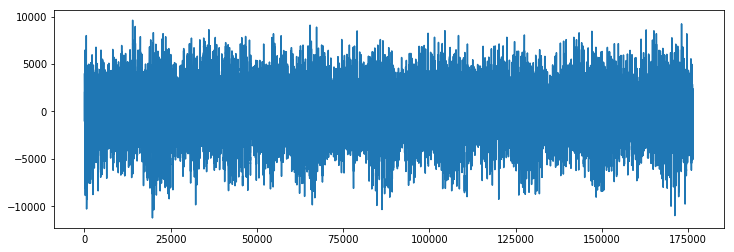

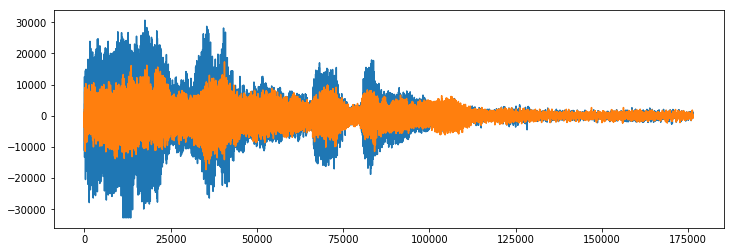

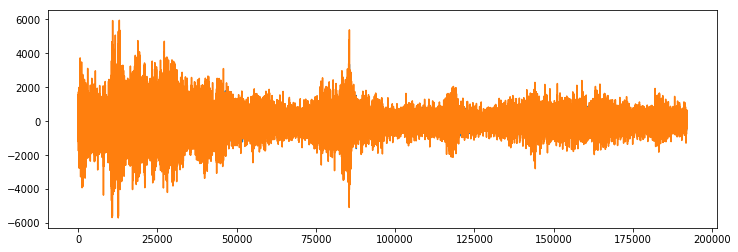

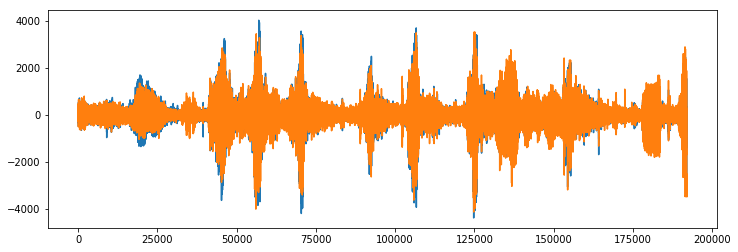

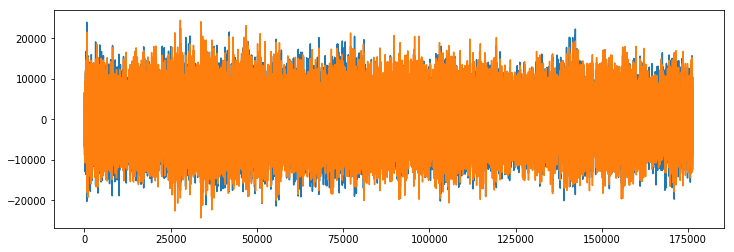

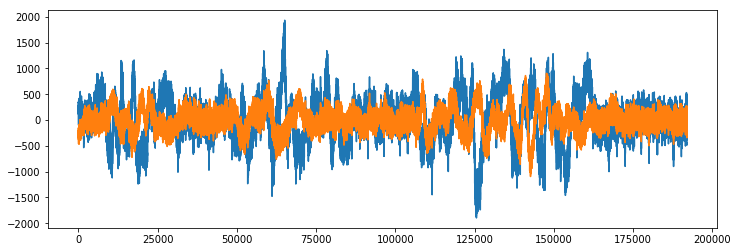

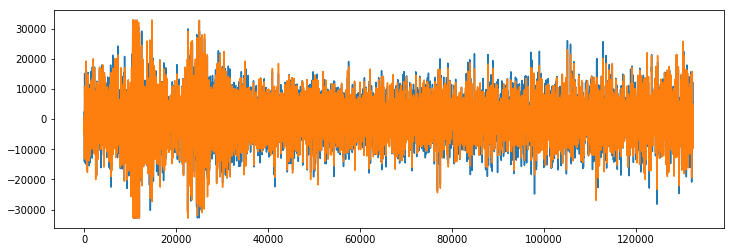

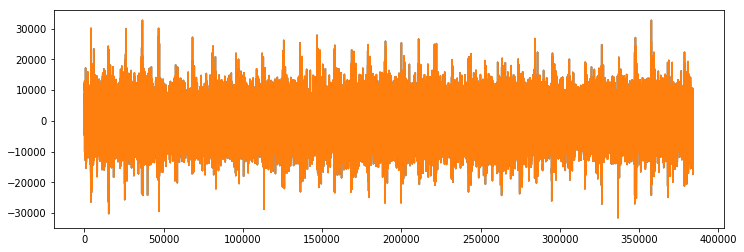

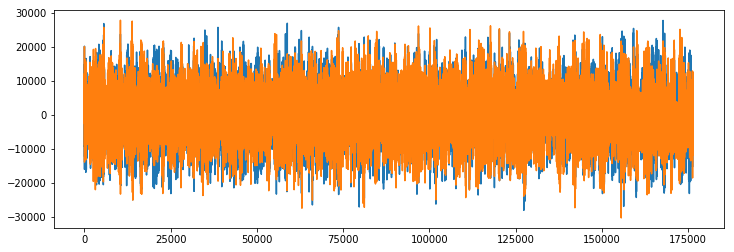

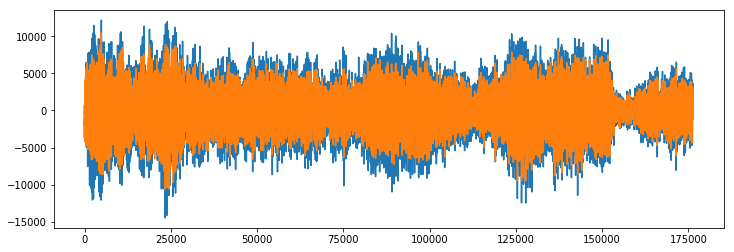

In [213]:
## showing the sample audio signal from each class of [0 -9]
select=[22,27,7,1,32,2,29,8,0,5]
for i in select:
        example=audio_files[i]
        example="./DataF/"+example
        rate, data = wavfile.read(example)
        librosa_audio, librosa_sample_rate = librosa.load(example)
        # scipy_sample_rate, scipy_audio = wav.read(fn)

        fig= plt.figure(figsize=(12, 4))
        plt.plot(data)

        

## C. Train and Test data



In [12]:
featuresdf = pd.DataFrame({"features":[i for i in MFCC],"class":[i for i in target['class']]})

In [13]:
featuresdf.head()

,features,class
0,"[-93.40145840508269, 149.22616236272734, -21.1...",8
1,"[-357.5367557791055, 82.77369432318324, -41.84...",3
2,"[-377.0994444658887, 111.39491176993639, -46.5...",5
3,"[-291.08529068940345, 94.33877895167892, -46.1...",3
4,"[-201.7274713564368, 153.83686222666503, -64.7...",8


In [14]:

# Convert features and corresponding classification labels into numpy arrays

X = np.array(featuresdf.features.tolist())
y = np.array(featuresdf['class'].tolist())
# Encode the classification labels


le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [15]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 127)

In [16]:
X.shape

(8732, 40)

## D. Build and train the model and evaluate using the testing set


In [17]:
num_labels = yy.shape[1]
filter_size = 2

In [18]:
def build_model_graph(input_shape=(40,)):
    model = Sequential()
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

In [19]:
model = build_model_graph()
# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
model.summary()




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               10496     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)  

In [193]:
#Training the model 
num_epochs = 500
num_batch_size = 20
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=0)

In [20]:
# load the pre-trained model
model.load_weights("model.h5")

In [21]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 95.59%
Testing Accuracy: 89.12%


After spliting the data into (80-20)% training vs testing. the feedforward model is used to build a cassification model. the drop out layer in each step is to avoid over fitting.as the labels are one hot encoded, the softmax activation is used for the output layer. the accuracy for training and testing is 96% and 90% respectively. the model is saved as h5 file, that can be found in the directory.

## Conclusion

In this study, the different steps for loading, pre-processing and classifiying of audio signals are demonstrated. using librosa library from python has enabled us, to  extract mathematically complex MFCCs from audio data, very easily. The neural network model is also used to classify audio based on those MFCCs, and evaluate the model on the test data. 